In [1]:
import tensorflow as tf

print("TensorFlow 버전:", tf.__version__)
print("GPU 사용 가능 여부:", tf.config.list_physical_devices('GPU'))


TensorFlow 버전: 2.19.0
GPU 사용 가능 여부: []


In [1]:
import torch
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

files = ['The Great Wall of China.npy']
resize_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # (C, H, W)
])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("사용 중인 장치:", device)

사용 중인 장치: cuda



📁 파일: The Great Wall of China.npy - 총 이미지 수: 193015


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51648 (\N{

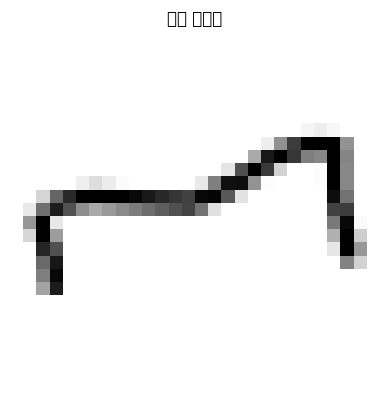

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


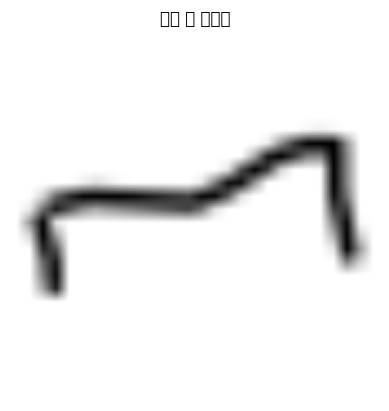

현재: 1/193015
현재: 2/193015
현재: 3/193015
현재: 4/193015
현재: 5/193015
현재: 6/193015
현재: 7/193015
현재: 8/193015
현재: 9/193015
현재: 10/193015
현재: 11/193015
현재: 12/193015
현재: 13/193015
현재: 14/193015
현재: 15/193015
현재: 16/193015
현재: 17/193015
현재: 18/193015
현재: 19/193015
현재: 20/193015
현재: 21/193015
현재: 22/193015
현재: 23/193015
현재: 24/193015
현재: 25/193015
현재: 26/193015
현재: 27/193015
현재: 28/193015
현재: 29/193015
현재: 30/193015
현재: 31/193015
현재: 32/193015
현재: 33/193015
현재: 34/193015
현재: 35/193015
현재: 36/193015
현재: 37/193015
현재: 38/193015
현재: 39/193015
현재: 40/193015
현재: 41/193015
현재: 42/193015
현재: 43/193015
현재: 44/193015
현재: 45/193015
현재: 46/193015
현재: 47/193015
현재: 48/193015
현재: 49/193015
현재: 50/193015
현재: 51/193015
현재: 52/193015
현재: 53/193015
현재: 54/193015
현재: 55/193015
현재: 56/193015
현재: 57/193015
현재: 58/193015
현재: 59/193015
현재: 60/193015
현재: 61/193015
현재: 62/193015
현재: 63/193015
현재: 64/193015
현재: 65/193015
현재: 66/193015
현재: 67/193015
현재: 68/193015
현재: 69/193015
현재: 70/193015
현재: 71/193015
현재: 72/193015
현

In [2]:
BATCH_SIZE = 1000  # 배치 크기 조절 가능

for file in files:
    data = np.load("data/" + file)
    data = data.reshape(-1, 28, 28)
    total_len = len(data)

    print(f"\n📁 파일: {file} - 총 이미지 수: {total_len}")

    # 메모리맵 파일 생성
    shape = (total_len, 1, 224, 224)
    dtype = np.float32
    mmap_path = "data/" + file
    mmap_array = np.memmap(mmap_path, dtype=dtype, mode='w+', shape=shape)

    write_index = 0

    for batch_start in range(0, total_len, BATCH_SIZE):
        batch_data = data[batch_start:batch_start + BATCH_SIZE]
        batch_items = []

        for j, img in enumerate(batch_data):
            global_index = batch_start + j

            if global_index == 0:
                plt.imshow(img, cmap='gray_r')
                plt.axis('off')
                plt.title('원본 이미지')
                plt.show()

            img_tensor = resize_transform(img.astype(np.uint8)).to(device)

            if global_index == 0:
                plt.imshow(img_tensor.cpu().squeeze(), cmap='gray_r')
                plt.axis('off')
                plt.title('변환 후 이미지')
                plt.show()

            batch_items.append(img_tensor.cpu().numpy())  # → numpy

            print(f"현재: {global_index + 1}/{total_len}")

        batch_array = np.stack(batch_items)  # (B, 1, 224, 224)
        mmap_array[write_index:write_index+len(batch_array)] = batch_array
        write_index += len(batch_array)

    # flush to disk
    mmap_array.flush()
    print("✅ memmap 저장 완료:", mmap_path)

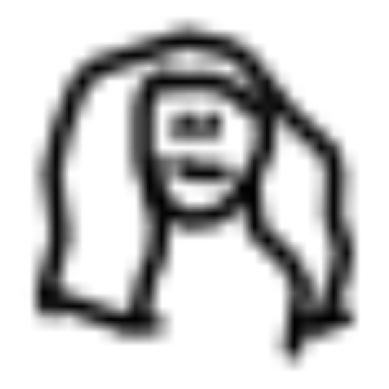

In [4]:
import matplotlib.pyplot as plt
import numpy as np

arr = np.load("data/" + file)  # 변환 후 저장된 파일 불러오기
img = arr[0]  # 첫 번째 이미지 텐서

plt.imshow(img.squeeze(), cmap='gray_r')
plt.axis('off')
plt.show()

In [1]:
import numpy as np
from PIL import Image

files = ['The Mona Lisa.npy']

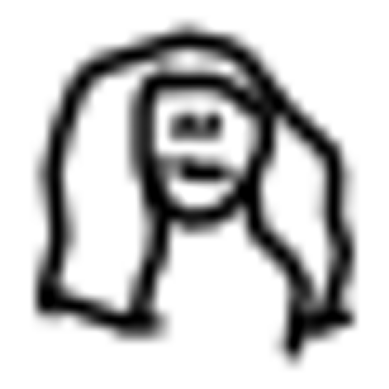

현재: 1 전체: 121383
현재: 2 전체: 121383
현재: 3 전체: 121383
현재: 4 전체: 121383
현재: 5 전체: 121383
현재: 6 전체: 121383
현재: 7 전체: 121383
현재: 8 전체: 121383
현재: 9 전체: 121383
현재: 10 전체: 121383
현재: 11 전체: 121383
현재: 12 전체: 121383
현재: 13 전체: 121383
현재: 14 전체: 121383
현재: 15 전체: 121383
현재: 16 전체: 121383
현재: 17 전체: 121383
현재: 18 전체: 121383
현재: 19 전체: 121383
현재: 20 전체: 121383
현재: 21 전체: 121383
현재: 22 전체: 121383
현재: 23 전체: 121383
현재: 24 전체: 121383
현재: 25 전체: 121383
현재: 26 전체: 121383
현재: 27 전체: 121383
현재: 28 전체: 121383
현재: 29 전체: 121383
현재: 30 전체: 121383
현재: 31 전체: 121383
현재: 32 전체: 121383
현재: 33 전체: 121383
현재: 34 전체: 121383
현재: 35 전체: 121383
현재: 36 전체: 121383
현재: 37 전체: 121383
현재: 38 전체: 121383
현재: 39 전체: 121383
현재: 40 전체: 121383
현재: 41 전체: 121383
현재: 42 전체: 121383
현재: 43 전체: 121383
현재: 44 전체: 121383
현재: 45 전체: 121383
현재: 46 전체: 121383
현재: 47 전체: 121383
현재: 48 전체: 121383
현재: 49 전체: 121383
현재: 50 전체: 121383
현재: 51 전체: 121383
현재: 52 전체: 121383
현재: 53 전체: 121383
현재: 54 전체: 121383
현재: 55 전체: 121383
현재: 56 전체: 121383
현

In [ ]:
import matplotlib.pyplot as plt
train_input = None
for file in files:
    data = np.load("data/" + file)
    data = data.reshape(-1, 28, 28)
    items = None
    for j in range(len(data)):
        item = np.array(Image.fromarray(data[j]).resize((224, 224))).reshape(1, 224, 224)
        
        if j == 0:
            items = item
            plt.imshow(item[0], cmap='gray_r')
            plt.axis('off')
            plt.show()
        else:
            items = np.concatenate((items, item), axis=0)

        print("현재:",j + 1, "전체:", len(data))
    
    print(file, "변환 저장..")
    np.save("data/" + file, items)



